# PCA Algorithm to distinguish different hand signs
By Mailin Brandt and Finian landes

In [1]:
### Imports
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [ ]:
#Loads Images from dir, size has to be provided (image in format size x size)
#returns images as vectors and image names as list
def load_images(dir: str, size: int = 256, grayscale: bool = True) -> np.ndarray:
    image_names: list = sorted(os.listdir(dir))
    n: int = len(image_names)
    images: np.ndarray = np.zeros([n, size ** 2])
    for i, name in enumerate(image_names):
        img: Image = Image.open(dir + "//"+ name)
        images[i] = img.getdata(0)
    return images, np.array(image_names)

#Generates a random train and test set with n_test test items
#returns train and test images and train and test names
def get_train_test_dataset(images: np.ndarray, image_names: list[str], n_test: int) -> tuple[np.ndarray, np.ndarray, list, list]:
    indices: list = np.random.choice(len(images), n_test, replace = False)
    test: np.ndarray = images[indices]
    names_test: list[str] = image_names[indices]
    train: np.ndarray = np.delete(images, indices, axis = 0)
    names_train: list[str] = np.delete(image_names, indices)
    return train, test, names_train, names_test

#Using the coeff_matrix, the eigenfaces and the meanface returns the index of the image which lies closest to point
#Returns index of closest image
def closest_neighbour(point: np.ndarray, meanface: np.ndarray , eigenfaces: np.ndarray, coeff_mat: np.ndarray) -> int:
    c1: np.ndarray = np.matmul(eigenfaces, point - meanface)
    distances: np.ndarray = np.sum((c1 - coeff_mat.T)**2, axis=1)
    return np.argmin(distances)

#Creates a matrix from the meanface, the eigenfaces and the passed points, which is used to increase efficiency of the PCA-Algorithm
#Returns a matrix in form n x n where n is the number of images
def coeff_matrix(meanface: np.ndarray, eigenfaces: np.ndarray, points: np.ndarray) -> np.ndarray:
    return np.matmul(eigenfaces, (points - meanface).T)

#Saves an image with a given filename stable for image in any format 
#Returns None
def save_image(picture: np.ndarray, filename: str, location: str = "..\Processed Images\Eigenfaces", size: int = 256) -> None:
    min_val: float = np.min(picture)
    picture = picture - min_val
    picture = picture / np.max(picture)
    picture = (255 * picture).astype(np.uint8)
    n_picture = np.reshape(picture, (size, size)).astype(dtype = np.uint8)
    plt.imshow(n_picture, cmap = "gray")
    plt.show()
    im = Image.fromarray(n_picture, mode="L")
    im.save(location + "/" + filename + ".jpg")

#Gets the successes of a given test set 
#Returns the percentage of correct predictions
def get_successes(test: np.ndarray, meanface: np.ndarray, eigenfaces: np.ndarray, coeff_mat: np.ndarray, names_train: list, names_test: list) -> float:
    successes: int = 0
    for j in range(len(test)):
        p: np.ndarray = test[j]
        i: int = closest_neighbour(p, meanface, eigenfaces, coeff_mat)
        pred_name: str = names_train[i][:-7] #Removes image name suffix _XX.jpg
        real_name: str = names_test[j][:-7]
        successes += (real_name == pred_name)
    return successes / len(test)
    

In [ ]:
image_dir_train: str = "..\Processed Images\Train"
image_dir_test: str = "..\Processed Images\Test"
n_test_images: int = 50
train, names_train = load_images(image_dir_train)
test, names_test = load_images(image_dir_test)

#Comment out the upper test set, and get some test pictures from the train data
#train, test, names_train, names_test = get_train_test_dataset(train, names_train, n_test_images)


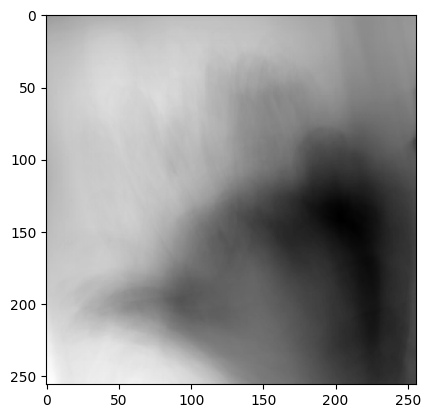

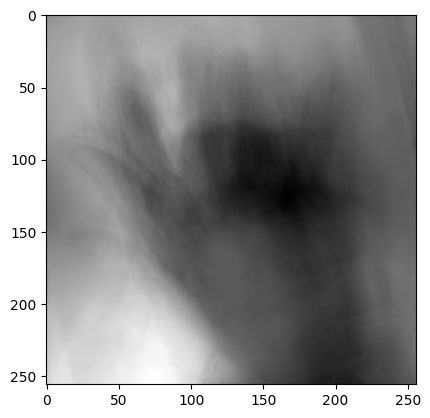

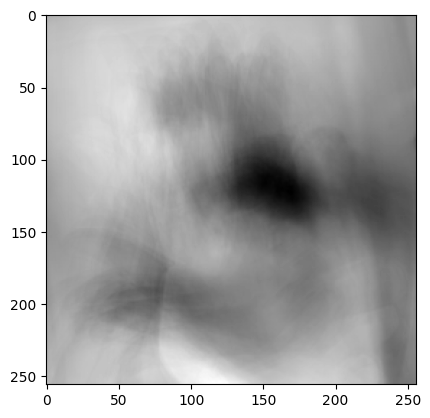

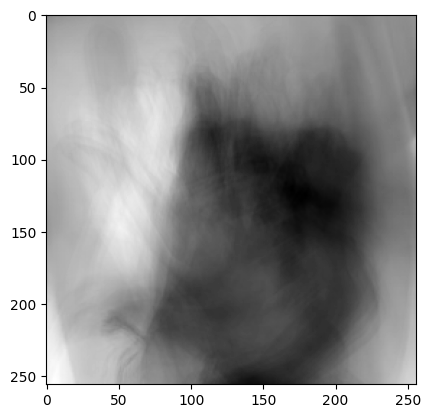

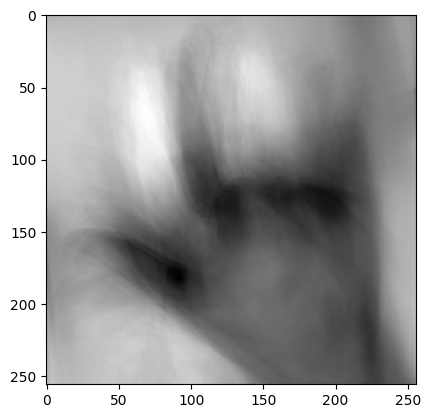

In [ ]:
meanface: np.ndarray = np.mean(train, axis=0)
A: np.ndarray = train - meanface
eigenfaces, s, VT = np.linalg.svd(A.transpose(), full_matrices=False)
eigenfaces: np.ndarray = eigenfaces.transpose()
coeff_mat: np.ndarray = coeff_matrix(meanface, eigenfaces, train)
for i in range(5):
    save_image(eigenfaces[i] * 5000 + meanface, "eigenface_"+str(i + 1))

In [5]:
s: float =  get_successes(test, meanface, eigenfaces, coeff_mat, names_train, names_test)
print ("Success rate: "+str(np.round(s * 100, 2)) +"%")


Success rate: 100.0%
